In [1]:
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def price(symbol, comparison_symbols=['USD'], exchange=''):
    url = 'https://min-api.cryptocompare.com/data/price?fsym={}&tsyms={}'\
            .format(symbol.upper(), ','.join(comparison_symbols).upper())
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()
    return data

In [3]:

def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [4]:
price('LTC', exchange='Coinbase')

{u'USD': 117.37}

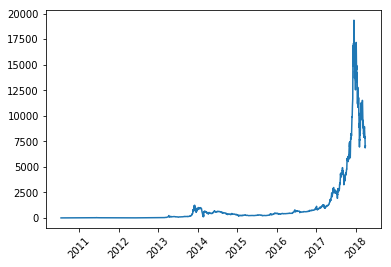

In [5]:
df = daily_price_historical('BTC', 'USD')
plt.plot(df.timestamp, df.close)
plt.xticks(rotation=45)
plt.show()

In [6]:
def hourly_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

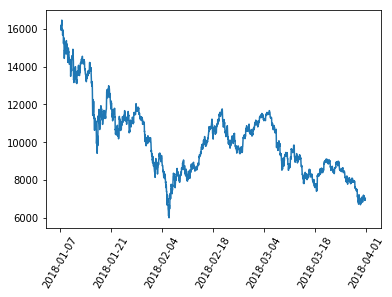

In [8]:
hourly_df = hourly_price_historical('BTC','USD',10000,1)
plt.plot(hourly_df.timestamp,hourly_df.close)
plt.xticks(rotation= 60)
plt.show()

In [9]:
def minute_price_historical(symbol, comparison_symbol, limit, aggregate, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

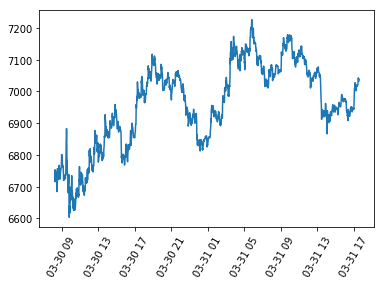

In [10]:
min_df = minute_price_historical('BTC','USD',10000,1)
plt.plot(min_df.timestamp,min_df.close)
plt.xticks(rotation= 60)
plt.show()

In [11]:
def coin_list():
    url = 'https://www.cryptocompare.com/api/data/coinlist/'
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [14]:
data = coin_list()
data

{u'LIFE': {u'Algorithm': u'N/A',
  u'CoinName': u'LIFE',
  u'FullName': u'LIFE (LIFE)',
  u'FullyPremined': u'0',
  u'Id': u'381189',
  u'ImageUrl': u'/media/14913568/life.png',
  u'Name': u'LIFE',
  u'PreMinedValue': u'N/A',
  u'ProofType': u'N/A',
  u'SortOrder': u'1834',
  u'Sponsored': False,
  u'Symbol': u'LIFE',
  u'TotalCoinSupply': u'100000000000',
  u'TotalCoinsFreeFloat': u'N/A',
  u'Url': u'/coins/life/overview'},
 u'XBY': {u'Algorithm': u'N/A',
  u'CoinName': u'XtraBYtes',
  u'FullName': u'XtraBYtes (XBY)',
  u'FullyPremined': u'0',
  u'Id': u'66694',
  u'ImageUrl': u'/media/20780760/xby.png',
  u'Name': u'XBY',
  u'PreMinedValue': u'N/A',
  u'ProofType': u'PoSign',
  u'SortOrder': u'1185',
  u'Sponsored': False,
  u'Symbol': u'XBY',
  u'TotalCoinSupply': u'650000000',
  u'TotalCoinsFreeFloat': u'N/A',
  u'Url': u'/coins/xby/overview'},
 u'AGI': {u'Algorithm': u'N/A',
  u'CoinName': u'SingularityNET',
  u'FullName': u'SingularityNET (AGI)',
  u'FullyPremined': u'0',
  u'Id'

In [15]:

def coin_snapshot_full_by_id(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/coinsnapshotfullbyid/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [17]:
symbol_id_dict = {symb: int(d['Id']) for symb, d in data.items()}
ETH_data = coin_snapshot_full_by_id('ETH', symbol_id_dict)
ETH_data

{u'General': {u'Algorithm': u'Ethash',
  u'BaseAngularUrl': u'/coins/eth/',
  u'BlockNumber': 5357909,
  u'BlockReward': 3.0,
  u'BlockRewardReduction': u'',
  u'BlockTime': 15,
  u'DangerTop': u'',
  u'Description': u'<p>Ethereum is a decentralized platform that runs smart contracts: applications that run exactly as programmed without any possibility of downtime, censorship, fraud or third party interference. In the\xa0Ethereum protocol and blockchain there is a price for each operation. The general idea is, in order to have things transferred or executed by the network, you have to <a href="/coins/guides/what-is-the-gas-in-ethereum/" target="_blank">consume or burn Gas</a>. The cryptocurrency\xa0is called Ether and is used\xa0to pay for computation time and for transaction fees.</p><p>If you want to earn block rewards from the network, you can join the network as a miner. Follow the link for\xa0a <a href="/mining/guides/how-to-mine-ethereum/" target="_blank">guide on how to mine Ethe

In [18]:
def live_social_status(symbol, symbol_id_dict={}):
    if not symbol_id_dict:
        symbol_id_dict = {
            'BTC': 1182,
            'ETH': 7605,
            'LTC': 3808
        }
    symbol_id = symbol_id_dict[symbol.upper()]
    url = 'https://www.cryptocompare.com/api/data/socialstats/?id={}'\
            .format(symbol_id)
    page = requests.get(url)
    data = page.json()['Data']
    return data

In [20]:
BTC_data = live_social_status('BTC', symbol_id_dict)
BTC_data

{u'CodeRepository': {u'List': [{u'closed_issues': u'46',
    u'closed_pull_issues': u'93',
    u'closed_total_issues': u'139',
    u'created_at': u'1304525025',
    u'fork': u'false',
    u'forks': 844,
    u'language': u'JavaScript',
    u'last_push': u'1522108504',
    u'last_update': u'1522532839',
    u'open_issues': u'15',
    u'open_pull_issues': u'14',
    u'open_total_issues': u'24',
    u'parent': {u'InternalId': -1, u'Name': u'', u'Url': u''},
    u'size': u'3004',
    u'source': {u'InternalId': -1, u'Name': u'', u'Url': u''},
    u'stars': 2531,
    u'subscribers': 167,
    u'url': u'https://github.com/bitcoinjs/bitcoinjs-lib'},
   {u'closed_issues': u'414',
    u'closed_pull_issues': u'588',
    u'closed_total_issues': u'1002',
    u'created_at': u'1292771803',
    u'fork': u'false',
    u'forks': 18006,
    u'language': u'C++',
    u'last_push': u'1522531413',
    u'last_update': u'1522535524',
    u'open_issues': u'16',
    u'open_pull_issues': u'8',
    u'open_total_issu